In [1]:
import numpy as np
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt

# from pvalue_metric import metric #some diffrences as __file__ is not defined for jupyter notebooks
import sys
import os
PACKAGE_DIR = Path(os.getcwd()).resolve().parents[0] / 'pvalue_metric'
sys.path.append(str(PACKAGE_DIR))
import metric

mean significant p-value portion: 0.5031, mean p-value: 0.16689521912750557
standard deviation of the significant p-value portion: 0.2942097721014718, standard deviation of p-values: 0.25048099407689645


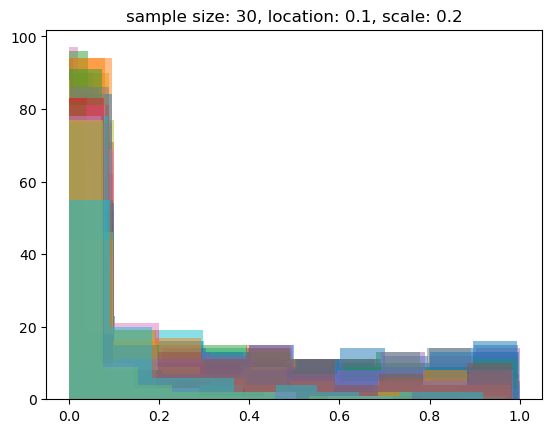

mean significant p-value portion: 0.5075999999999999, mean p-value: 0.15655735401651438
standard deviation of the significant p-value portion: 0.3043751632443094, standard deviation of p-values: 0.21407274987980665


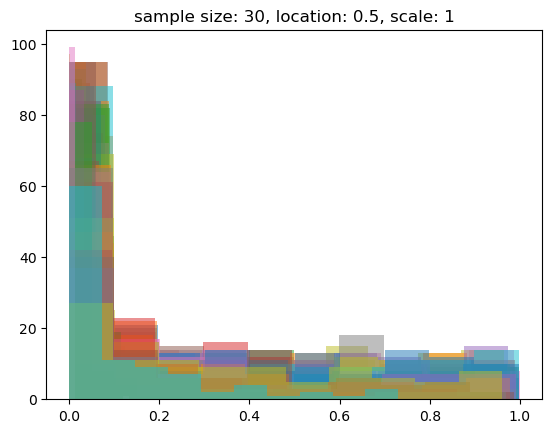

mean significant p-value portion: 0.47100000000000003, mean p-value: 0.19430157149740332
standard deviation of the significant p-value portion: 0.2955790926300437, standard deviation of p-values: 0.25899520109622015


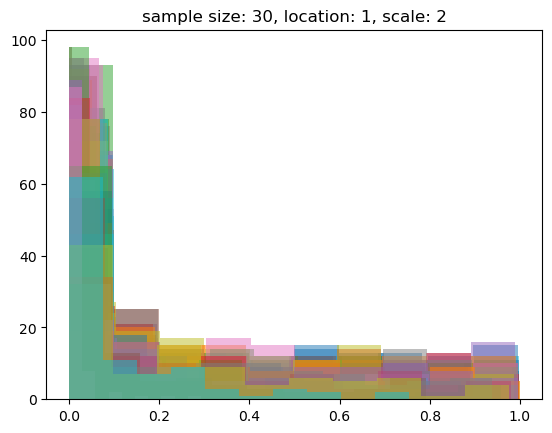

mean significant p-value portion: 0.4993, mean p-value: 0.18046509699628913
standard deviation of the significant p-value portion: 0.32040678831760105, standard deviation of p-values: 0.24590047058402528


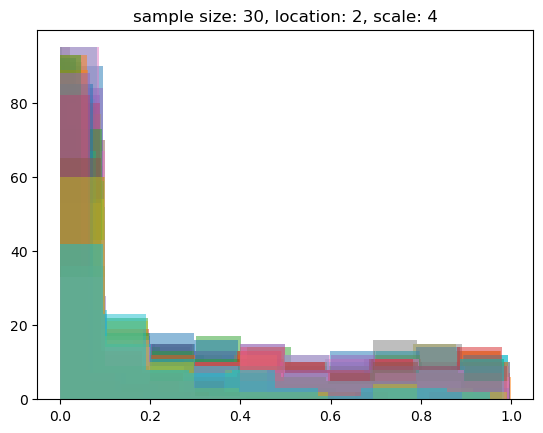

In [11]:
itr = 100
n_bootstrap = 100
sample_size = 30
location = [0.1, 0.5, 1, 2]
scale = [0.2, 1, 2, 4]
for k in range(len(location)):
    portions = np.zeros(itr)
    pvalues = np.zeros(itr)
    for i in range(itr):

        g1_samples = np.random.normal(loc=0.0, scale=scale[k], size=sample_size)
        g2_samples = np.random.normal(loc=location[k], scale=scale[k], size=sample_size)
        t, pvalues[i] = stats.ttest_ind(g1_samples,g2_samples)
        #    metric.pvalue_test([a,b], stats.ttest_ind, 500, 500)[0][0]
        g1_bootstraps = [np.random.choice(g1_samples,len(g1_samples), replace=True) for j in range(n_bootstrap)]
        g2_bootstraps = [np.random.choice(g2_samples, len(g2_samples), replace=True) for j in range(n_bootstrap)]
    
        original_cohort_pvalues = [stats.ttest_ind(g1_bootstraps[j],g2_bootstraps[j])[1] for j in range(n_bootstrap)]
        portions[i] = len(list(filter(lambda p: p< 0.05,original_cohort_pvalues)))/len(original_cohort_pvalues)

        plt.hist(original_cohort_pvalues, alpha=0.5)
        plt.title(f"sample size: {sample_size}, location: {location[k]}, scale: {scale[k]}")

    print(f"mean p-value: {np.mean(pvalues)}", f"standard deviation of p-values: {np.sqrt(np.var(pvalues))}")
    print(f"mean significant p-value portion: {np.mean(portions)}", \
          f"standard deviation of the significant p-value portion: {np.sqrt(np.var(portions))}")
    
    plt.show()

In [22]:
#check p metric performance here and also estimated mean
itr = 100
n = len(location)
n_bootstrap = 100
n_permutation = 200
sample_size = 30
location = [0.1, 0.5, 1, 2]
scale = [0.2, 1, 2, 4]

pvalues = np.zeros((n, itr))
mean_bootstrapped_pvalues = np.zeros((n, itr))
pmetric = np.zeros((n, itr))

for k in range(n):
    for i in range(itr):
        
        g1_samples = np.random.normal(loc=0.0, scale=scale[k], size=sample_size)
        g2_samples = np.random.normal(loc=location[k], scale=scale[k], size=sample_size)

        g1_bootstraps = [np.random.choice(g1_samples,len(g1_samples), replace=True) for j in range(n_bootstrap)]
        g2_bootstraps = [np.random.choice(g2_samples, len(g2_samples), replace=True) for j in range(n_bootstrap)]
        bootstrapped_pvalues = [stats.ttest_ind(g1_bootstraps[j],g2_bootstraps[j])[1] for j in range(n_bootstrap)]

        pvalues[k,i] = stats.ttest_ind(g1_samples,g2_samples)[1]
        mean_bootstrapped_pvalues[k,i] = np.mean(bootstrapped_pvalues)
        pmetric[k,i] = metric.pvalue_test([g1_samples,g2_samples], stats.ttest_ind, sample_size, n_permutation)[0][0]

In [35]:
print(f"mean pvalue ", *np.mean(pvalues, axis=1))
print(f"mean bootstrapped pvalue ", *np.mean(mean_bootstrapped_pvalues, axis=1))
print(f"mean p metric ", *np.mean(pmetric, axis=1))


mean pvalue  0.15873091302732983 0.16837315758211832 0.1445058250877004 0.17260820549562472
mean bootstrapped pvalue  0.18414295612905027 0.20099200969091885 0.1860849992903038 0.19529639985666672
mean p metric  0.16849999999999998 0.17805000000000004 0.14485 0.17285


In [36]:
print(f"std pvalue ", *np.std(pvalues, axis=1))
print(f"std of mean bootstrapped pvalue ", *np.std(mean_bootstrapped_pvalues, axis=1))
print(f"std p metric ", *np.std(pmetric, axis=1))   

std pvalue  0.22924501231390146 0.22889208489028184 0.20677226317121822 0.23599661197470698
std of mean bootstrapped pvalue  0.1513130862788555 0.15352878617545113 0.13567774845029404 0.1617836887114923
std p metric  0.23964609322916156 0.22911230324886528 0.18879678890277768 0.23965939893941152


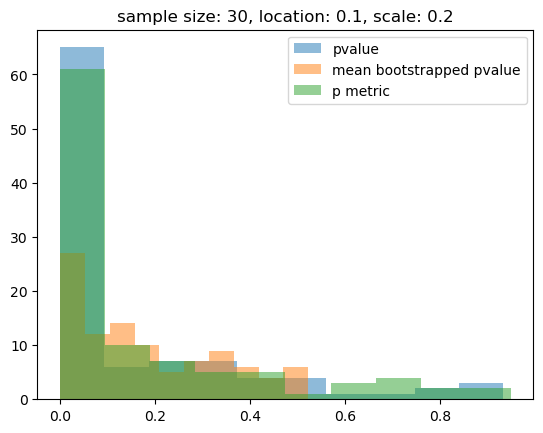

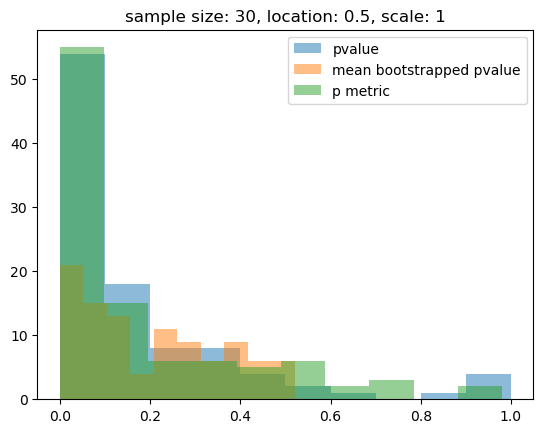

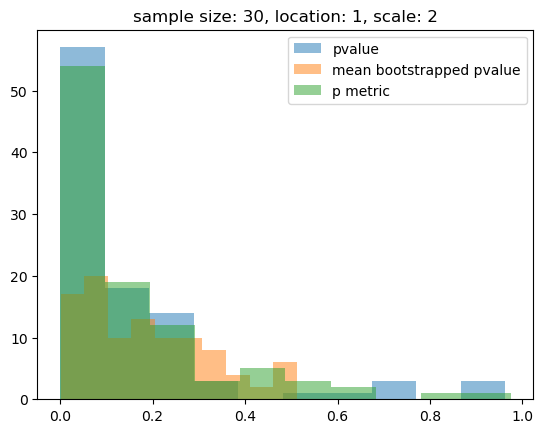

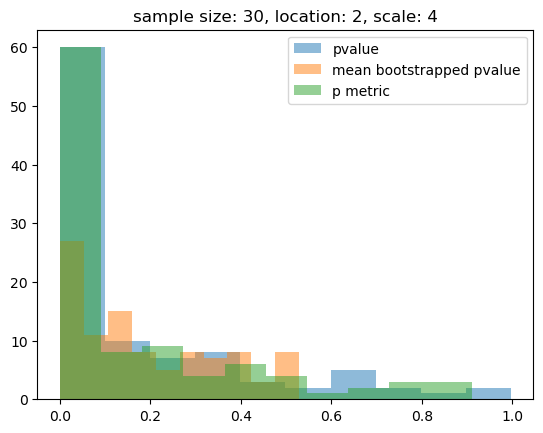

In [37]:
for k in range(n):
    plt.hist(pvalues[k,:], alpha=0.5, label="pvalue")
    plt.hist(mean_bootstrapped_pvalues[k,:], alpha=0.5, label="mean bootstrapped pvalue")
    plt.hist(pmetric[k,:], alpha=0.5, label="p metric")
    plt.legend()
    plt.title(f"sample size: {sample_size}, location: {location[k]}, scale: {scale[k]}")
    plt.show()

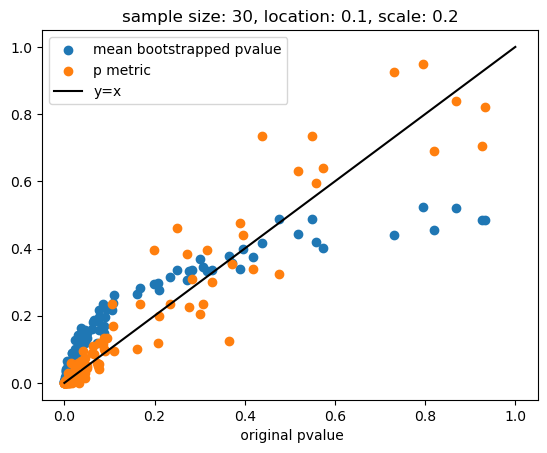

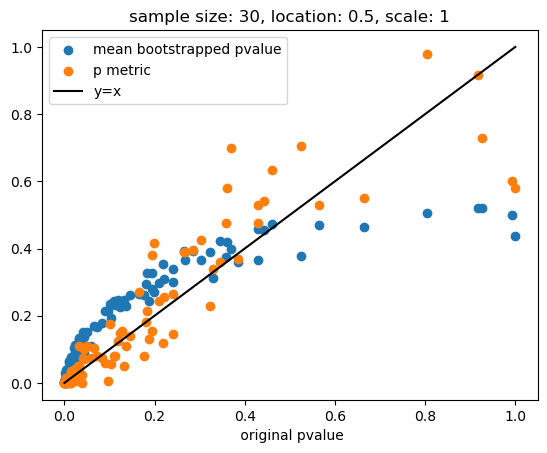

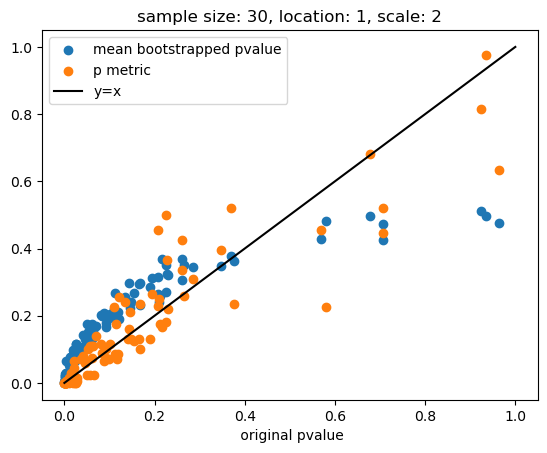

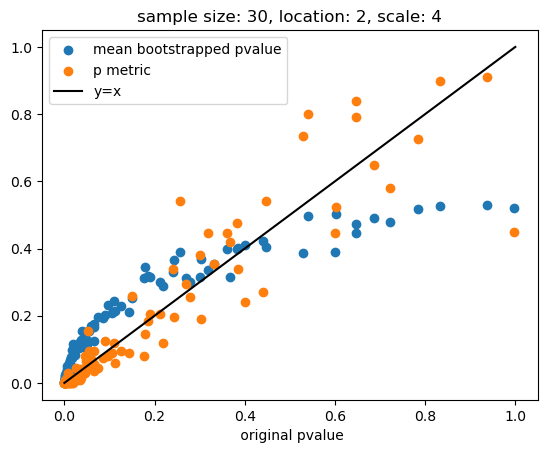

In [44]:
for k in range(n):
    plt.scatter(pvalues[k,:], mean_bootstrapped_pvalues[k,:], label="mean bootstrapped pvalue")
    plt.scatter(pvalues[k,:], pmetric[k,:], label="p metric")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), label="y=x", color="black")
    plt.xlabel(" original pvalue")
    plt.legend()
    plt.title(f"sample size: {sample_size}, location: {location[k]}, scale: {scale[k]}")
    plt.show()

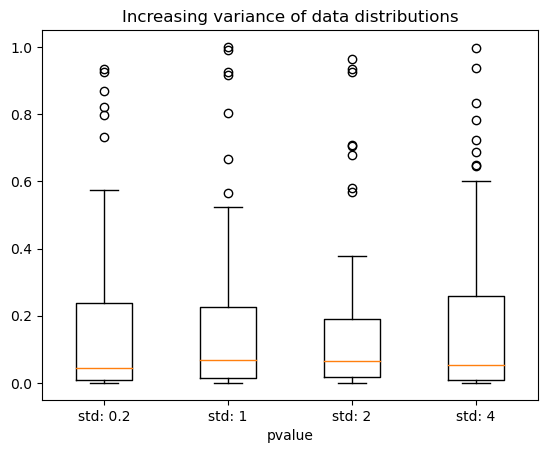

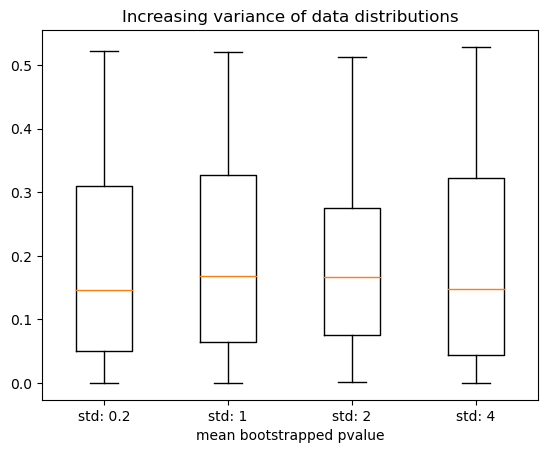

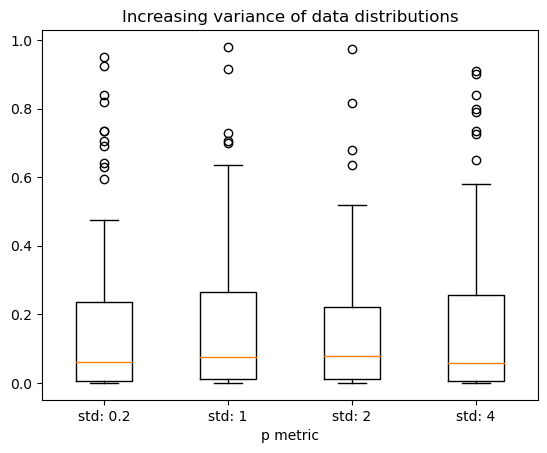

In [55]:
groups = [pvalues, mean_bootstrapped_pvalues, pmetric]
names = ["pvalue", "mean bootstrapped pvalue", "p metric"]
for (i,p) in enumerate(groups):
    plt.boxplot(p.T)
    plt.xlabel(names[i])
    plt.xticks([1,2,3,4], [f"std: {scale[k]}" for k in range(n)])
    plt.title("Increasing variance of data distributions")
    plt.show()


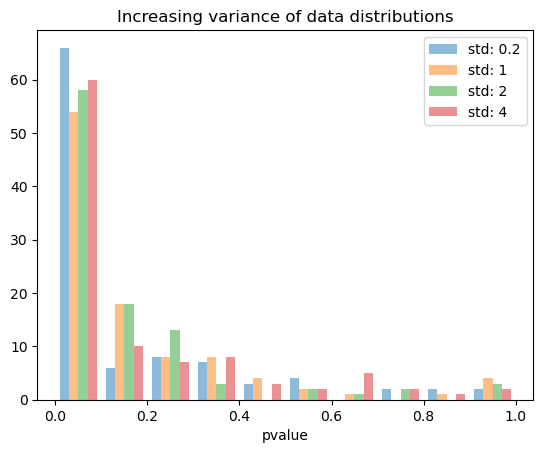

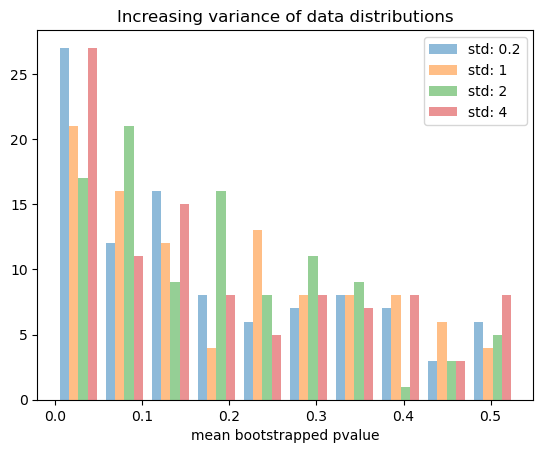

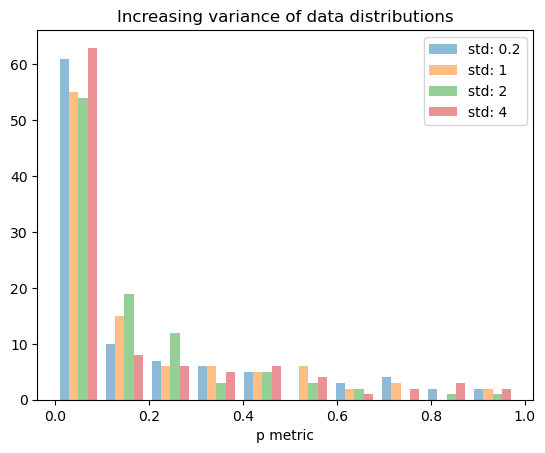

In [59]:
for (i, p) in enumerate(groups):
    plt.hist(p.T, alpha=0.5)
    plt.legend([f"std: {scale[k]}" for k in range(n)])
    plt.xlabel(names[i])
    plt.title("Increasing variance of data distributions")
    plt.show()